# Exact Algorithms

The obvious advantage of such algorithms is the guarantee that the output is optimal. However, with the TSP being classified NP-hard, it seems that all exact algorithms must have superpolynomial time complexity. This is certainly true of the algorithms demonstrated below. This notebook may take a couple of minutes to execute all cells.

In [1]:
from Req import brute_tour, held_karp, gen_ran, Hamiltonian
from GraphTheory.tspt import tspfull3
from time import time
import matplotlib.pyplot as plt

We start by creating a list of randomly generated maps to use in our investigation.

In [2]:
maps = [gen_ran(i) for i in range(3, 20)]

## Brute Force Search

We investigate how fast the CPU time of finding a brute force optimal solution increases with the size of the problem. With factorial time complexity, things rapidly get out of hand.

Time elapsed: 0.0 seconds


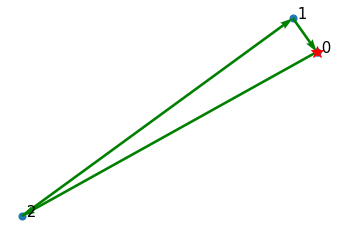

Time elapsed: 0.0 seconds


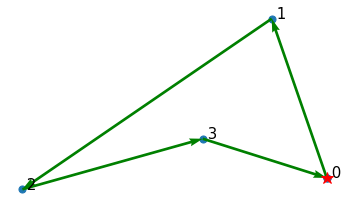

Time elapsed: 0.0 seconds


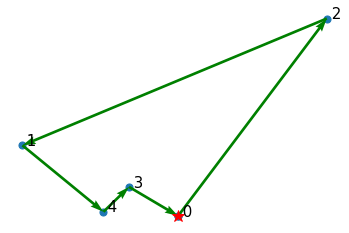

Time elapsed: 0.001 seconds


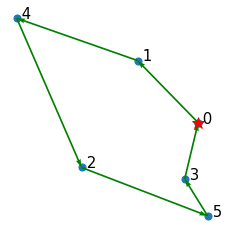

Time elapsed: 0.006 seconds


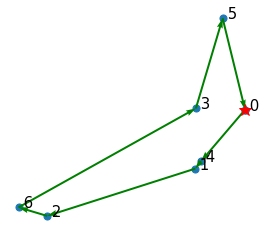

Time elapsed: 0.085 seconds


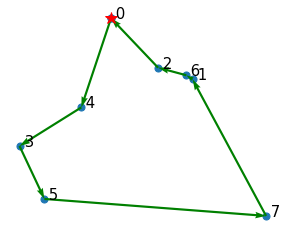

Time elapsed: 0.619 seconds


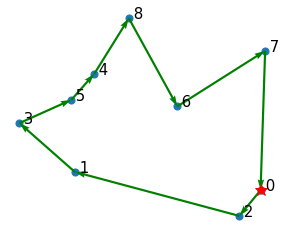

Time elapsed: 5.836 seconds


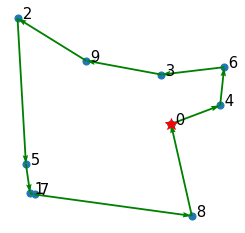

Time elapsed: 65.917 seconds


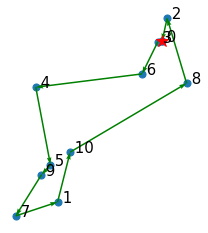

In [3]:
bf_times = []
for map in maps[:9]:
    t0 = time()
    dummy = brute_tour(map)
    t1 = time()
    t = t1 - t0
    bf_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## Dynamic Programming

The Held-Karp algorithm utilises memoisation to rule out sub-optimal tours, making it more efficient than brute force. This leads to an improved but still terrible time complexity of $O(n^{2}2^{n})$.

Time elapsed: 0.0 seconds


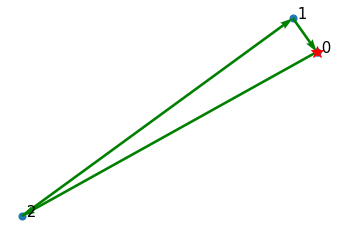

Time elapsed: 0.0 seconds


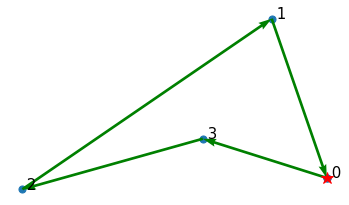

Time elapsed: 0.001 seconds


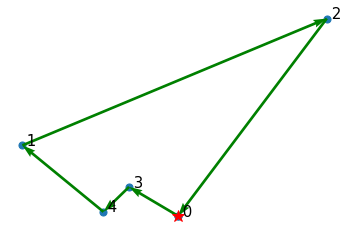

Time elapsed: 0.001 seconds


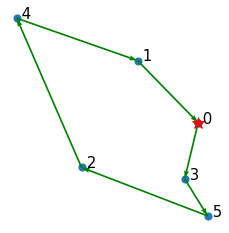

Time elapsed: 0.003 seconds


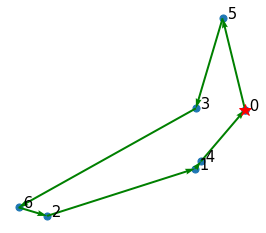

Time elapsed: 0.007 seconds


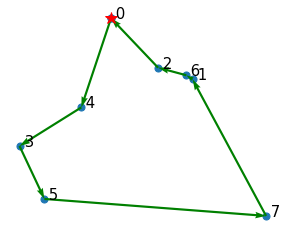

Time elapsed: 0.026 seconds


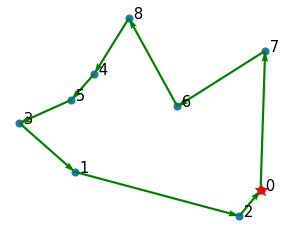

Time elapsed: 0.064 seconds


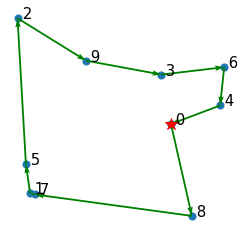

Time elapsed: 0.214 seconds


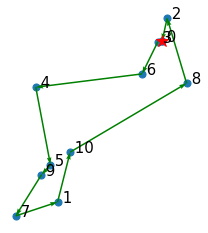

Time elapsed: 0.472 seconds


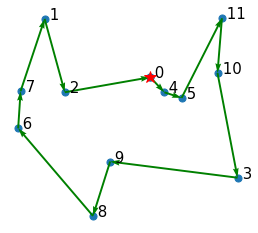

Time elapsed: 1.1 seconds


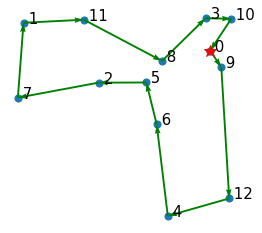

Time elapsed: 2.7 seconds


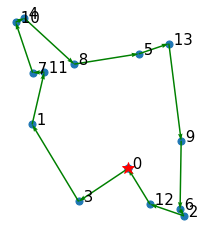

Time elapsed: 6.651 seconds


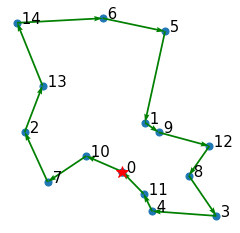

Time elapsed: 15.823 seconds


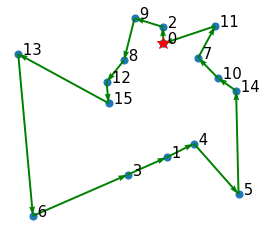

Time elapsed: 41.864 seconds


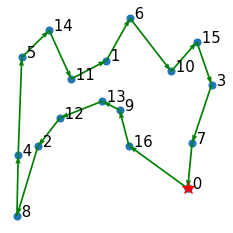

Time elapsed: 104.192 seconds


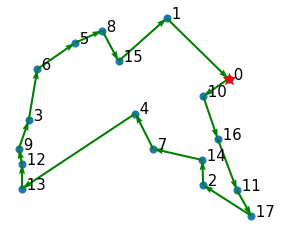

In [4]:
hk_times = []
for map in maps[:16]:
    t0 = time()
    dummy = held_karp(map)
    t1 = time()
    t = t1 - t0
    hk_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## Branch and Bound

Time elapsed: 0.002 seconds


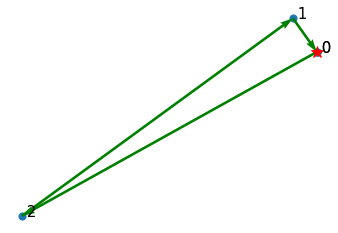

Time elapsed: 0.005 seconds


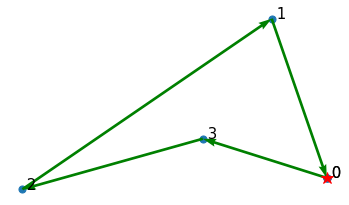

Time elapsed: 0.008 seconds


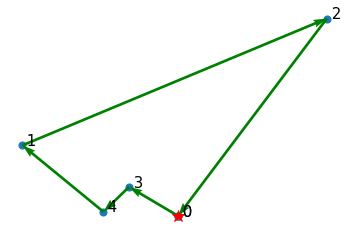

Time elapsed: 0.018 seconds


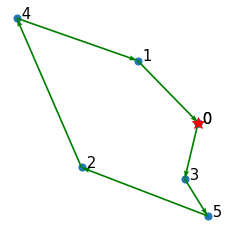

Time elapsed: 0.053 seconds


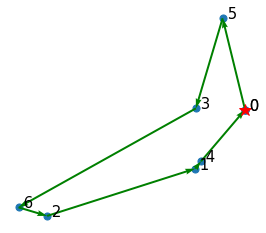

Time elapsed: 0.056 seconds


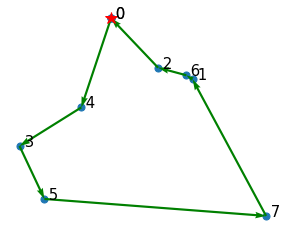

Time elapsed: 0.077 seconds


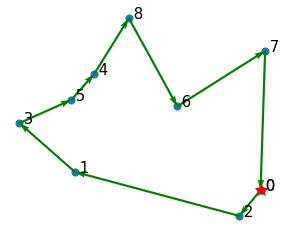

Time elapsed: 0.436 seconds


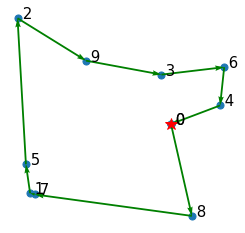

Time elapsed: 3.822 seconds


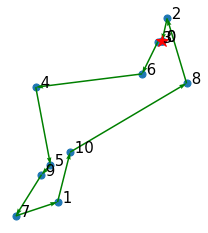

Time elapsed: 2.814 seconds


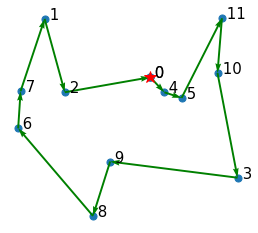

Time elapsed: 56.839 seconds


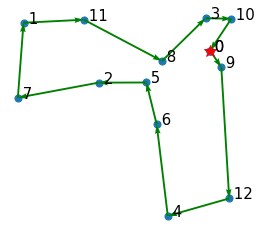

In [5]:
bb_times = []
for map in maps[:11]:
    t0 = time()
    dummy = Hamiltonian(tspfull3(map.D)[1], map)
    t1 = time()
    t = t1 - t0
    bb_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## A Comparison

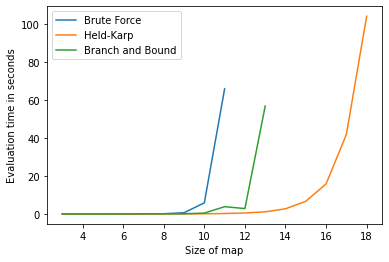

In [6]:
plt.plot([i for i in range(3, 12)], bf_times, label='Brute Force')
plt.plot([i for i in range(3, 19)], hk_times, label='Held-Karp')
plt.plot([i for i in range(3, 14)], bb_times, label='Branch and Bound')
plt.legend()
plt.xlabel("Size of map")
plt.ylabel("Evaluation time in seconds")
plt.show()

In [7]:
lis = [str((a, b)) for a,b in zip([i for i in range(3,12)], bf_times)]
''.join(lis)

'(3, 4.291534423828125e-05)(4, 9.393692016601562e-05)(5, 0.00019073486328125)(6, 0.0009913444519042969)(7, 0.0061681270599365234)(8, 0.08476758003234863)(9, 0.6192684173583984)(10, 5.836167097091675)(11, 65.91654801368713)'

In [9]:
lis = [str((a, b)) for a,b in zip([i for i in range(3,19)], hk_times)]
''.join(lis)

'(3, 5.984306335449219e-05)(4, 0.0001819133758544922)(5, 0.0005164146423339844)(6, 0.000789642333984375)(7, 0.002542734146118164)(8, 0.0067958831787109375)(9, 0.025884389877319336)(10, 0.06362366676330566)(11, 0.21351146697998047)(12, 0.47246551513671875)(13, 1.1000823974609375)(14, 2.7000200748443604)(15, 6.651190996170044)(16, 15.823089599609375)(17, 41.86384439468384)(18, 104.1917028427124)'

In [10]:
lis = [str((a, b)) for a,b in zip([i for i in range(3,14)], bb_times)]
''.join(lis)

'(3, 0.002294301986694336)(4, 0.004645347595214844)(5, 0.007845878601074219)(6, 0.018179893493652344)(7, 0.05330038070678711)(8, 0.05551934242248535)(9, 0.07729649543762207)(10, 0.43569231033325195)(11, 3.821509599685669)(12, 2.813793420791626)(13, 56.839229106903076)'